In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

2023-06-27 13:52:07.449107: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-27 13:52:07.500751: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-27 13:52:07.501830: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 13:52:08.470798: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Load and scale the data

In [2]:
feature = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2023SummerML1/main/Day5/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2023SummerML1/main/Day5/fish_market_label.csv')
X = feature.values
y = label.values

In [3]:
# normalize the data using sklearn's StandardScaler
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler(with_mean=False)
scalerY = StandardScaler(with_mean=False)
Xs = scalerX.fit_transform(X)
ys = scalerY.fit_transform(y)

In [4]:
## TODO
# split the SCALED!! data in validation and train

X_train, X_val, y_train, y_val = train_test_split(Xs, ys, test_size=0.1, random_state=3)

In [5]:
## TODO
# print the number of data samples in the training and validation data
print(len(X_train))
print(len(X_val))

111
13


### Build Model

1) Define a model of three dense hidden layers with ReLU activation functions, plus an final dense layer. The output of the hidden layers should have 32 neurons each. 

2) Train the model for 2000 epochs with a batch size of 64 and a mean squared error loss.


In [6]:
## TODO
n_epochs = 2000
batch_size = 64

model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics='mse'
) # use the Adam optimizer

model.summary()
# print a summary of the model

Model: "sequential"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [16]:
%%timeit -n 1 -r 1
## TODO
# train the model (use the train data and validation data from above)

history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/2000
2/2 [==============================] - 0s 36ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 2/2000
2/2 [==============================] - 0s 28ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 3/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 4/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 5/2000
2/2 [==============================] - 0s 29ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 6/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 7/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 8/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.0077 - m

In [18]:
%%timeit -n 1 -r 1
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val), batch_size=batch_size, verbose=0)
# Much faster with no verbosity!

56.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


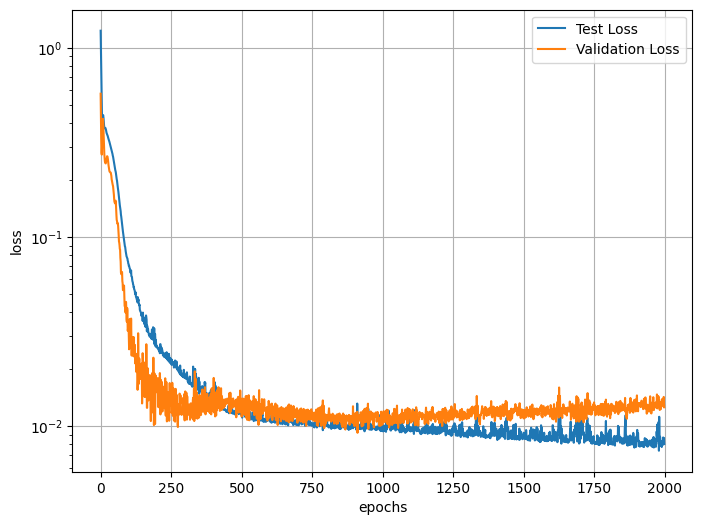

In [8]:
## TODO
# plot the train and validation losses on the same picture
# make sure to label the axis and create a legend
loss_history = history.history['loss']
val_his = history.history['val_loss']

plt.figure(figsize=(8,6))
plt.semilogy(loss_history, label="Test Loss")
plt.semilogy(val_his, label="Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()

#### Load the testing dataset

In [9]:
X_test = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2023SummerML1/main/Day5/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2023SummerML1/main/Day5/fish_market_test_label.csv').values

In [10]:
# scale the test data using the scalerX above
Xtest_s = scalerX.fit_transform(X_test)

In [11]:
## TODO
# predict the corresponding y_hat value of the test dataset (use the scaled test data)
y_hat = model.predict(Xtest_s)
y_test = scalerY.fit_transform(y_test)

1/1 [==============================] - 0s 105ms/step


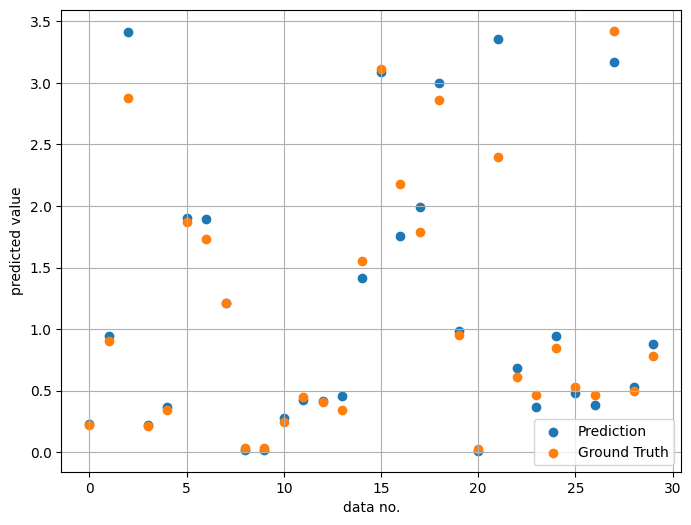

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(np.arange(y_hat.shape[0]), y_hat, label='Prediction')
plt.scatter(np.arange(y_test.shape[0]), y_test, label='Ground Truth')
plt.legend()
plt.xlabel('data no.')
plt.ylabel('predicted value')
plt.grid()

In [13]:
## TODO
# print MSE, RMSE (root-mse), MAE on the train and test data
# compare these results against last week's results (when we used linear/polynimial regression)
mse_val = ((y_test - y_hat) ** 2).mean()
rmse = np.sqrt(mse_val)
print(mse_val)

0.054118524854236356
